In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, '..//src')

d:\OneDrive - Cardiff University\04 - Projects\20 - UKERC\03 - Code\flexibilitydwellings\notebooks
d:
OneDrive - Cardiff University
04 - Projects
20 - UKERC
03 - Code
flexibilitydwellings
notebooks
d:\


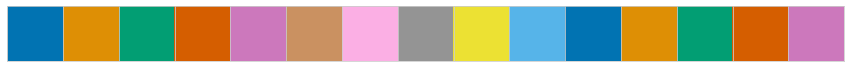

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl
import seaborn as sns
import sys
from matplotlib.ticker import MaxNLocator
import flexibility.thermal_model as tm
import flexibility.dwellings_model as dm
import flexibility.dwelling_functions as dwelling_functions
import flexibility.utils as utils
import visualization.visualize as visualize
from flexibility.enums import Method
import random
from typing import List

random.seed(42)

# blues = [x for x in reversed(sns.color_palette("Blues_d", 11))]
# sns.set_palette(sns.color_palette("Paired", 10))
# sns.set_style("white")
sns.set_palette(sns.color_palette("colorblind", 15))
plt.rcParams['font.family'] = 'Times New Roman'
font_size = 12
params = {'axes.labelsize': font_size+2,
          'axes.titlesize':font_size+4,
          'legend.fontsize': font_size, 
          'xtick.labelsize': font_size,
          'ytick.labelsize': font_size,
          'font.size': font_size}
plt.rcParams.update(params)
sns.set_style("whitegrid")
fig_format = "png"
dpi = 1000
figsize = (12, 3.5)
figsize_map = (10, 6)
sns.palplot(sns.color_palette())

markers = ['x', 'o', '^', 's', '*', 'v']

print(os.getcwd())
computer_path= ""
for x in os.getcwd().split(os.path.sep):
    print(x)
    computer_path=computer_path+x+os.path.sep
    if x == "sceac10":
        break    
    else: computer_path = os.getcwd().split(os.path.sep)[0]+os.path.sep
print(computer_path)

ukerc_path_data = r'D:\OneDrive - Cardiff University\04 - Projects\20 - UKERC'
saving_path = r"D:\OneDrive - Cardiff University\04 - Projects\03 - PhD\03 - Analysis\03 - LSOAs\00 - Data\Domestic_EPC_results\EPC_thermal_capacity" #computer_path

In [4]:
def plot_results(validf, orgdf):
    f, ax = plt.subplots(figsize=figsize)
    orgdf["Indoor_temperature_degreeC"].plot(ax=ax, marker=markers[0], markevery=10000, label='Python_indoor_temperature')
    if len(validf)>0:
        validf["Indoor_temperature_degreeC"].plot(ax=ax, marker=markers[1], markevery=9500, label='Simulink_indoor_temperature')
    orgdf["Outdoor_temperature_degreeC"].plot(ax=ax, marker=markers[2], markevery=10000, label='Outdoor_temperature')
    ax.set_ylim(-10, None)
    ax.margins(0, None)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Temperature (ºC)')
    ax.get_xaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: '{:,.0f}'.format(x)))
    ax.legend()
    return f, ax





## Validation of thermal model 1

In [5]:
init_T_in = -4. #C
init_T_out = 15. #C
init_P_out = 8.*1000 #W output from heat pump
R_d = 1/(0.3*1000) #K/W
C_d = 10000*1000 #J/K

model1 = tm.ThermalModel(R_d, C_d, init_T_out, init_T_in, 24, -3).init_parameters()
print(model1)
print(model1.get_max_temperature(init_P_out))
output_df = model1.RC_model_data(init_P_out)
output_df.loc[54000:, "Outdoor_temperature_degreeC"] = 5
output_df = model1.run_RC_model(output_df)
output_df

ThermalModel(R=0.0033333333333333335, C=10000000, outdoor_air_temperature=15.0, initial_indoor_air_temperature=-4.0, limit_indoor_air_temperature=24, design_temperature=-3, target_indoor_air_temperature=21, initial_heating_output=0, max_heating_output=7200.0)
41.67


,Indoor_temperature_degreeC,Outdoor_temperature_degreeC,Heating_output_kW
0,-4.000000,15.0,8000.0
1,-3.998630,15.0,8000.0
2,-3.997260,15.0,8000.0
3,-3.995890,15.0,8000.0
4,-3.994520,15.0,8000.0
...,...,...,...
107995,31.857237,5.0,8000.0
107996,31.857231,5.0,8000.0
107997,31.857225,5.0,8000.0
107998,31.857219,5.0,8000.0


In [6]:
# get data produced using simulink software
validation_df = utils.get_validation_data('Case 2 (2)')

(<Figure size 864x252 with 1 Axes>,
 <AxesSubplot:xlabel='Time (s)', ylabel='Temperature (ºC)'>)

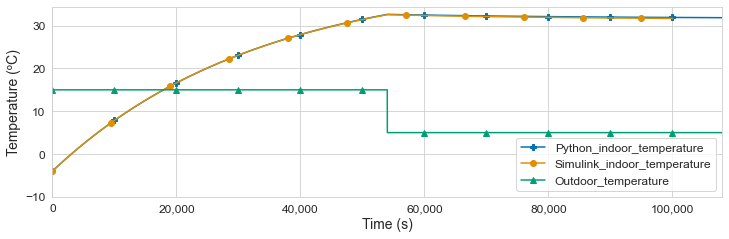

In [7]:
# compare results
visualize.plot_thermal_model_results(model1.RC_model_df, validation_df)

In [8]:
validation_df = utils.get_validation_data('Case 1 (2)')

In [9]:
init_T_in = -4. #C
init_T_out = -4. #C
init_P_out = 8.*1000 #W output from heat pump
R_d = 1/(0.3*1000) #K/W
C_d = 10000*1000 #J/K

model1 = tm.ThermalModel(R_d, C_d, init_T_out, init_T_in, 24, -3).init_parameters()
print(model1.get_max_temperature(init_P_out))
output_df = model1.RC_model_data(init_P_out)
output_df = model1.run_RC_model(output_df)
output_df

22.67


,Indoor_temperature_degreeC,Outdoor_temperature_degreeC,Heating_output_kW
0,-4.000000,-4.0,8000.0
1,-3.999200,-4.0,8000.0
2,-3.998400,-4.0,8000.0
3,-3.997600,-4.0,8000.0
4,-3.996800,-4.0,8000.0
...,...,...,...
107995,21.622190,-4.0,8000.0
107996,21.622222,-4.0,8000.0
107997,21.622253,-4.0,8000.0
107998,21.622284,-4.0,8000.0


(<Figure size 864x252 with 1 Axes>,
 <AxesSubplot:xlabel='Time (s)', ylabel='Temperature (ºC)'>)

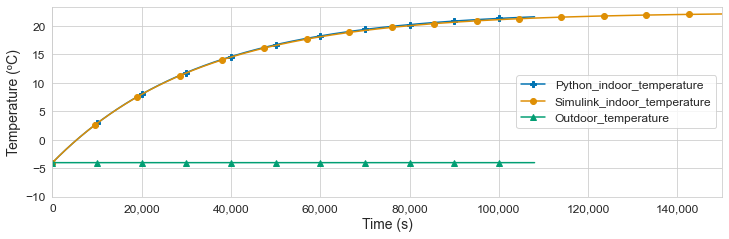

In [10]:
visualize.plot_thermal_model_results(model1.RC_model_df, validation_df)

18.0


(<Figure size 864x252 with 1 Axes>,
 <AxesSubplot:xlabel='Time (s)', ylabel='Temperature (ºC)'>)

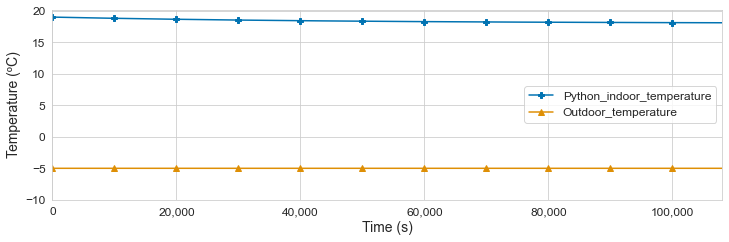

In [12]:
init_T_in = 19 #C
init_T_out = -5. #C
init_P_out = 20.457760 #W output from heat pump
R_d = 1.124268 #K/kW
C_d = 42057.692308 #kJ/K

model1 = tm.ThermalModel(R_d, C_d, init_T_out, init_T_in, 24, -3).init_parameters()
print(model1.get_max_temperature(init_P_out))
output_df = model1.RC_model_data(init_P_out)
output_df = model1.run_RC_model(output_df)
output_df

visualize.plot_thermal_model_results(model1.RC_model_df, pd.DataFrame())

## Validation of function to estimate duration of service

In [11]:
# single dwelling data
init_T_in = 21. #C
init_T_out = 0. #C
R_d = 1/(0.3*1000) #K/W
C_d = 10000*1000 #J/K
P_out_temp = 1000

model1 = tm.ThermalModel(R_d, C_d, init_T_out, init_T_in, 24, -3).init_parameters()
init_P_out = model1.initial_heating_output
print(f'{init_P_out} and {model1.max_heating_output}')

6300.0 and 7200.0


(<Figure size 864x252 with 1 Axes>,
 <AxesSubplot:xlabel='Time (s)', ylabel='Temperature (ºC)'>)

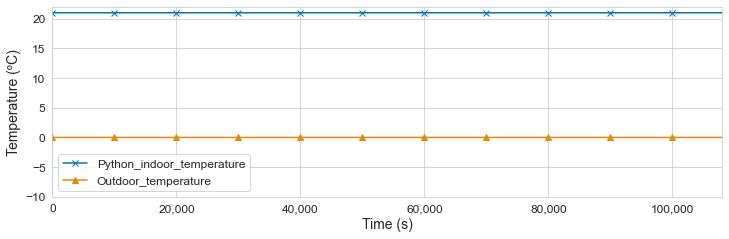

In [12]:
output_df = model1.RC_model_data(init_P_out)
output_df = model1.run_RC_model(output_df)
visualize.plot_thermal_model_results(model1.RC_model_df, pd.DataFrame())

In [13]:
# How long does it take to reach 19C
T_limit = 19
model1.limit_indoor_air_temperature = T_limit
model1.get_duration_service(P_out_temp)

4004.75

(<Figure size 864x252 with 1 Axes>,
 <AxesSubplot:xlabel='Time (s)', ylabel='Temperature (ºC)'>)

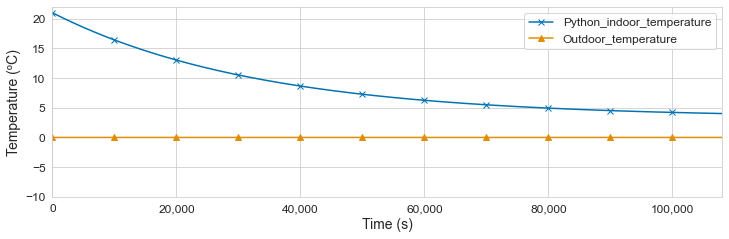

In [14]:
# validation of the duration done by comparing to figure below
output_df = model1.RC_model_data(P_out_temp)
output_df = model1.run_RC_model(output_df)
visualize.plot_thermal_model_results(model1.RC_model_df, pd.DataFrame())

## Flexibility of dwellings at LSOA level

In [14]:
# load LSOA data
lsoa_data = pd.read_csv(saving_path+'Thermal_characteristics_LSOA_EandW.csv', index_col=0) 
lsoa_data.reset_index(inplace=True)

### for a single LSOA

In [16]:
index_lsoa = 1500
lsoa_name = lsoa_data.loc[index_lsoa, 'LSOA11CD']
total_R = 1/lsoa_data.loc[index_lsoa, 'Total thermal losses kW/K']  
total_C = (lsoa_data.loc[index_lsoa, 'Total medium thermal capacity GJ/K']*1000000) #K/kJ
design_temperature = lsoa_data.loc[index_lsoa, 'Design_temperature_degreeC']  


init_T_in = 19. #C
init_T_out = -5. #C
T_limit = 18


print(f'In LSOA: {lsoa_name}, the aggregated dwellings have a total R of {total_R} kW/K, C of {total_C} K/kJ')
print(f'The design temperature in this LSOA is {design_temperature} C')

In LSOA: E01001523, the aggregated dwellings have a total R of 0.00398118933211918 kW/K, C of 16212293.05267012 K/kJ
The design temperature in this LSOA is -2.0 C


In [17]:
# get heat output based on current indoor and outdoor temperature

In [17]:
model2 = tm.ThermalModel(total_R, total_C, init_T_out, init_T_in, T_limit, design_temperature).init_parameters()
init_P_out = model2.initial_heating_output
max_P_out = model2.max_heating_output
max_P_out

5777.168

In [18]:
model2.get_duration_service(max_P_out)

-1

(<Figure size 864x252 with 1 Axes>,
 <AxesSubplot:xlabel='Time (s)', ylabel='Temperature (ºC)'>)

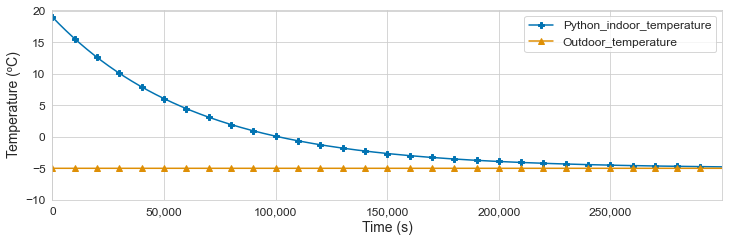

In [21]:
# validation of the duration done by comparing to figure below
output_df = model2.RC_model_data(0, length_index = 300000)
output_df = model2.run_RC_model(output_df)
visualize.plot_thermal_model_results(model2.RC_model_df, pd.DataFrame())

(<Figure size 864x252 with 1 Axes>,
 <AxesSubplot:xlabel='Time (s)', ylabel='Temperature (ºC)'>)

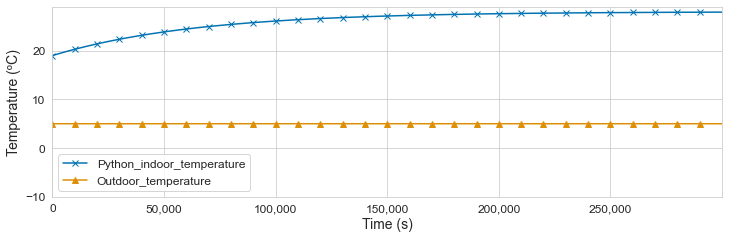

In [21]:
# validation of the duration done by comparing to figure below
output_df = model2.RC_model_data(max_P_out, length_index = 300000)
output_df = model2.run_RC_model(output_df)
visualize.plot_thermal_model_results(model2.RC_model_df, pd.DataFrame())

### Characteristics of thermal parameters in England and Wales

['Average thermal losses flat oil boiler kW/K', 'Average thermal losses detached gas boiler kW/K', 'Average thermal losses detached resistance heating kW/K', 'Average thermal losses detached oil boiler kW/K', 'Average thermal losses detached biomass boiler kW/K', 'Average thermal losses semi-detached gas boiler kW/K', 'Average thermal losses semi-detached resistance heating kW/K', 'Average thermal losses semi-detached oil boiler kW/K', 'Average thermal losses semi-detached biomass boiler kW/K', 'Average thermal losses terraced gas boiler kW/K', 'Average thermal losses terraced resistance heating kW/K', 'Average thermal losses terraced oil boiler kW/K', 'Average thermal losses terraced biomass boiler kW/K', 'Average thermal losses flat gas boiler kW/K', 'Average thermal losses flat resistance heating kW/K', 'Average thermal losses flat biomass boiler kW/K'] 16


<AxesSubplot:xlabel='R_K/kW', ylabel='Count'>

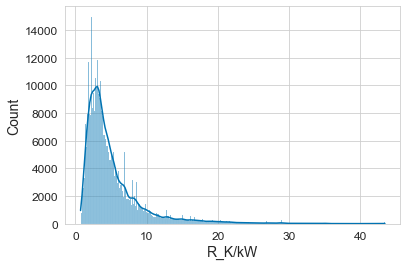

In [22]:
thermal_losses_cols = [x for x in lsoa_data.columns if 'Average thermal losses' in x]
print(thermal_losses_cols, len(thermal_losses_cols))
R_df = lsoa_data[thermal_losses_cols].stack().reset_index(drop=True).to_frame()
R_df  = 1/R_df 
R_df.columns = ['R_K/kW']

std_R = R_df.std()
min_R = R_df.min()-std_R
max_R = R_df.max()+std_R

sns.histplot(data=R_df, x='R_K/kW', kde=True)

['Average medium thermal capacity flat oil boiler kJ/K', 'Average medium thermal capacity detached gas boiler kJ/K', 'Average medium thermal capacity detached resistance heating kJ/K', 'Average medium thermal capacity detached oil boiler kJ/K', 'Average medium thermal capacity detached biomass boiler kJ/K', 'Average medium thermal capacity semi-detached gas boiler kJ/K', 'Average medium thermal capacity semi-detached resistance heating kJ/K', 'Average medium thermal capacity semi-detached oil boiler kJ/K', 'Average medium thermal capacity semi-detached biomass boiler kJ/K', 'Average medium thermal capacity terraced gas boiler kJ/K', 'Average medium thermal capacity terraced resistance heating kJ/K', 'Average medium thermal capacity terraced oil boiler kJ/K', 'Average medium thermal capacity terraced biomass boiler kJ/K', 'Average medium thermal capacity flat gas boiler kJ/K', 'Average medium thermal capacity flat resistance heating kJ/K', 'Average medium thermal capacity flat biomass b

<AxesSubplot:xlabel='C_kJ/K', ylabel='Count'>

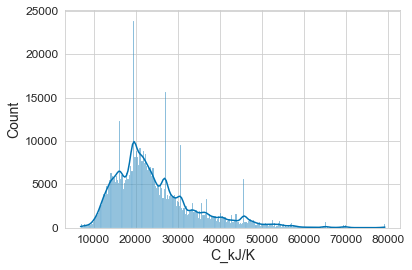

In [23]:
thermal_capacity_level = 'medium'
thermal_capacity_cols = [x for x in lsoa_data.columns if f'Average {thermal_capacity_level} thermal capacity' in x]
print(thermal_capacity_cols, len(thermal_capacity_cols))
C_df = lsoa_data[thermal_capacity_cols].stack().reset_index(drop=True).to_frame()
C_df.columns = ['C_kJ/K']

std_C = C_df.std()
min_C = C_df.min()-std_C
max_C = C_df.max()+std_C

sns.histplot(data=C_df, x='C_kJ/K', kde=True)

## On a single LSOA

In [ ]:
features = ["Average thermal capacity MJ/K", "Average thermal losses kW/K"]
temp_arr = rounded_tidy_df.loc[:, features].values.astype(float)
weights = rounded_tidy_df.loc[:,"Number of dwellings"].values

full_tidy_arr = np.repeat(temp_arr, list(weights), axis=0)
# import clhs as cl
# cLHS_index = cl.clhs(full_tidy_arr, 5, max_iterations=10000)

In [230]:
full_tidy_arr[cLHS_index['sample_indices']]

array([[12.864 ,  0.0503],
       [27.536 ,  0.318 ],
       [35.012 ,  0.4914],
       [20.941 ,  0.3417],
       [17.225 ,  0.2671]])

In [176]:
import itertools

def extend_cLHS_with_extremes(dataf:pd.DataFrame, features:List[str])->List[int]:
       list_extremes = []
       for temp_features in itertools.permutations(features, len(features)):
              temp_df = dataf.sort_values(list(temp_features))
              min_index = temp_df.index[0]
              list_extremes.append(min_index)
              max_index = temp_df.index[-1]
              list_extremes.append(max_index)

       return list(set(list_extremes))

In [177]:
cLHS_index += extend_cLHS_with_extremes(to_sample_df, features)

Average thermal capacity MJ/K
Average thermal losses kW/K


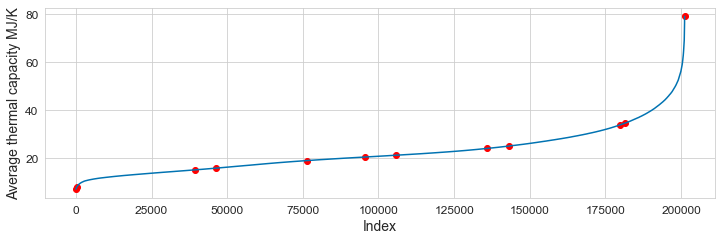

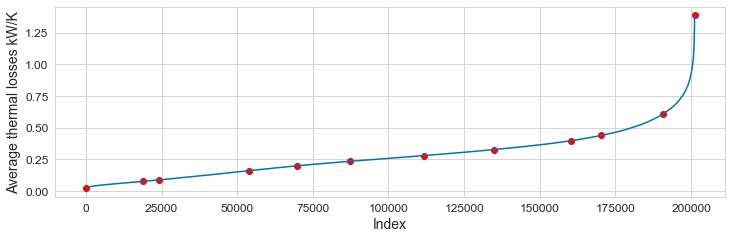

In [181]:
for feat in features:
    print(feat)
    f, ax = plt.subplots(figsize=figsize)
    temp_df = to_sample_df.sort_values(feat).reset_index().copy()
    temp_df[feat].plot(ax=ax)
    x_arr = temp_df.loc[temp_df["Index"].isin(cLHS_index), :].index 
    y_arr = temp_df.loc[x_arr, feat]
    ax.scatter(x= x_arr, y=y_arr, color='red')
    ax.set_ylabel(feat)
    ax.set_xlabel("Index")
    

In [37]:
# for a single dwelling

categories = ['detached gas boiler',
             ]

index_lsoa=[1500]
capacity_factor = 1

(
    temperature_func,
    T_limit,
    demand_increase,
) = dwelling_functions.get_inside_air_temperature_func(
    capacity_factor
)

RC_constant_dwellings = dm.Dwellings(index_lsoa, T_limit, capacity_factor)
RC_constant_dwellings.categories = categories
RC_constant_dwellings.initial_indoor_temperature = 19
RC_constant_dwellings.thermal_capacity_level = 'high'
RC_constant_dwellings = RC_constant_dwellings.create_dwellings(lsoa_data)
RC_constant_df = RC_constant_dwellings.dwellings_df
RC_constant_df = RC_constant_df.drop_duplicates(subset=['C_kJ/K', 'R_K/kW']).copy()

# Create additional identical dwellings
copy_org_df = RC_constant_df.copy()
for _ in range(500):
    RC_constant_df = RC_constant_df.append(copy_org_df)
nb_dwellings = len(RC_constant_df)
RC_constant_df.reset_index(inplace=True, drop=True)
RC_constant_dwellings.dwellings_df = RC_constant_df

RC_constant_dwellings = (RC_constant_dwellings
                        .add_variables(None))

RC_constant_dwellings.dwellings_df['Initial_indoor_temperature_ºC'] = np.linspace(14, 24, nb_dwellings)

RC_constant_dwellings.dwellings_df = RC_constant_dwellings.calculate_initial_variables(RC_constant_dwellings.dwellings_df)
RC_constant_dwellings = RC_constant_dwellings.get_duration_service(dm.Method.INDIVIDUAL)
RC_constant_df = RC_constant_dwellings.temp_df.copy()
RC_constant_df.index.name = 'Index'
RC_constant_df.reset_index(inplace=True)
# f, ax = visualize.plot_duration_individual_dwellings(RC_constant_df, 160000, 'min', 'kW')
# ax.legend()


0.3371694242213513
0.0


Text(0.5, 0, 'Duration_s')

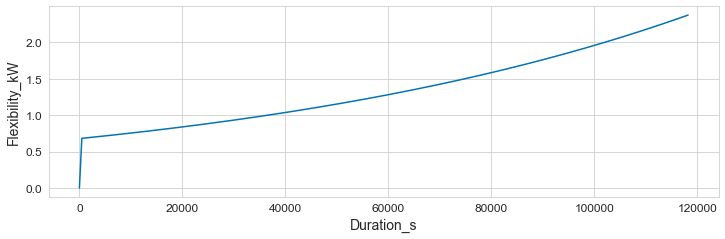

In [38]:
f, ax = plt.subplots(figsize=figsize)
dataf = RC_constant_df[['Flexibility_provided_kW', 'Duration_s']].copy()

if nb_dwellings>len(dataf):
    #Dwellings which did not provided any flexibility were removed from the dataset
    dataf = dataf.append({'Flexibility_provided_kW':0, 'Duration_s':0}, ignore_index=True)

dataf.sort_values(['Flexibility_provided_kW', 'Duration_s'], inplace=True)

y_arr = dataf['Flexibility_provided_kW'].values
x_arr = dataf['Duration_s'].values

ax.plot(x_arr, y_arr)
ax.set_ylabel('Flexibility_kW')
ax.set_xlabel('Duration_s')
# 24-10

In [39]:
import copy
# for a group of identical dwellings
capacity_factor = 1
demand_increase = True # default assumption
index_lsoa= [1500]
categories = ['detached gas boiler',
             ]

(
    temperature_func,
    T_limit,
    demand_increase,
) = dwelling_functions.get_inside_air_temperature_func(
    capacity_factor,
)

# Monte Carlo simulation

# Create a Dwellings object of identical dwellings
RC_constant_dwellings = dm.Dwellings(index_lsoa, T_limit, capacity_factor)
RC_constant_dwellings.categories = categories
RC_constant_dwellings.initial_indoor_temperature = 19
RC_constant_dwellings.thermal_capacity_level = 'medium'
RC_constant_dwellings = RC_constant_dwellings.create_dwellings(lsoa_data)
RC_constant_df = RC_constant_dwellings.dwellings_df
RC_constant_df = RC_constant_df.drop_duplicates(subset=['C_kJ/K', 'R_K/kW']).copy()

# Create additional identical dwellings
copy_org_df = RC_constant_df.copy()
for _ in range(500):
    RC_constant_df = RC_constant_df.append(copy_org_df)
nb_dwellings = len(RC_constant_df)
RC_constant_df.reset_index(inplace=True, drop=True)
RC_constant_dwellings.dwellings_df = RC_constant_df

RC_constant_dwellings = (RC_constant_dwellings
                        .add_variables(None))
                        
frames = []
for _ in range(100):
    temp_dwellings_obj = copy.deepcopy(RC_constant_dwellings)
    temp_dwellings_obj.dwellings_df['Initial_indoor_temperature_ºC'] = [temperature_func(x) for x in range(nb_dwellings)]

    temp_dwellings_obj.dwellings_df = temp_dwellings_obj.calculate_initial_variables(temp_dwellings_obj.dwellings_df)
    temp_dwellings_obj = (temp_dwellings_obj
                            .get_duration_service(dm.Method.INDIVIDUAL)
                            .concat_results())

    frames.append(temp_dwellings_obj.concat_results_df['Flexibility_provided_(Individual_dwellings)_kW'].to_frame().copy())

0.3371694242213513
0.0


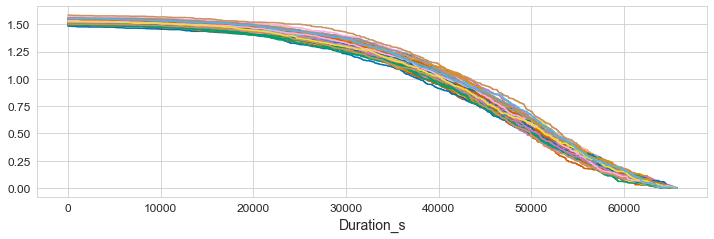

In [40]:
final_df = pd.concat(frames, axis=1).fillna(0)/nb_dwellings
f, ax = plt.subplots(figsize=figsize)
final_df.plot(ax=ax)
ax.legend().remove()

# For an aggregation of LSOAs and multiple scenarios

In [41]:
nb_slice = 0
capacity_factor = 1
filename = f'concat_results_slice_{nb_slice}_cf_{capacity_factor}_lsoas.csv'
slice_lsoas_df = pd.read_csv(os.path.join(saving_path, filename), index_col=0)

<AxesSubplot:xlabel='Duration_s'>

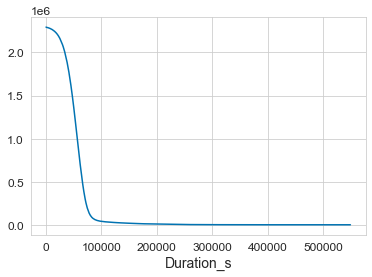

In [42]:
slice_lsoas_df.sum(axis=1).plot()